In [1]:
import matplotlib.pyplot as plt

%matplotlib inline  

##%matplotlib notebook


In [2]:
#__worker_class__

class Worker(object):

    def columns(self):
        return ["ntracks_pmtrack", "track_pmtrack.ntrkhits_pmtrack","trkhits_pmtrack.dedx", "trkhits_pmtrack.xyz"]

    def init(self, dataset, my_id):
        pass

    def run(self, events, emit):
        for ie, e in enumerate(events):

            j = 0
            trkhits = e.trkhits_pmtrack
            for it, t in enumerate(e.track_pmtrack):
                for ip in (0,1,2):
                    nh = max(t.ntrkhits_pmtrack[ip], 0)
                    for ihit in xrange(nh):
                        dedx = trkhits[j].dedx
                        xyz = trkhits[j].xyz
                        
                        emit("dedx", dedx)
                        emit("hitx", xyz[0])
                        emit("hity", xyz[1])
                        emit("hitz", xyz[2])
                        
                        j += 1             

        #emit("dedx", 1.0)

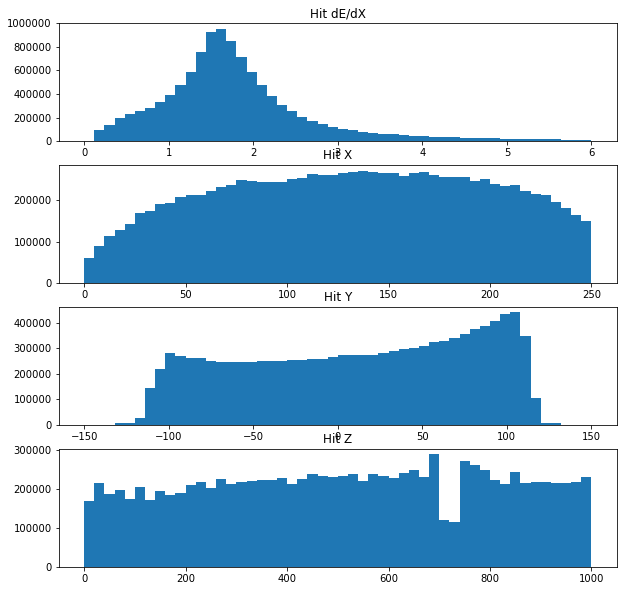

Job finished. 8692 events processed using 46 workers in 33.1 seconds, 2.62e+02 events/second


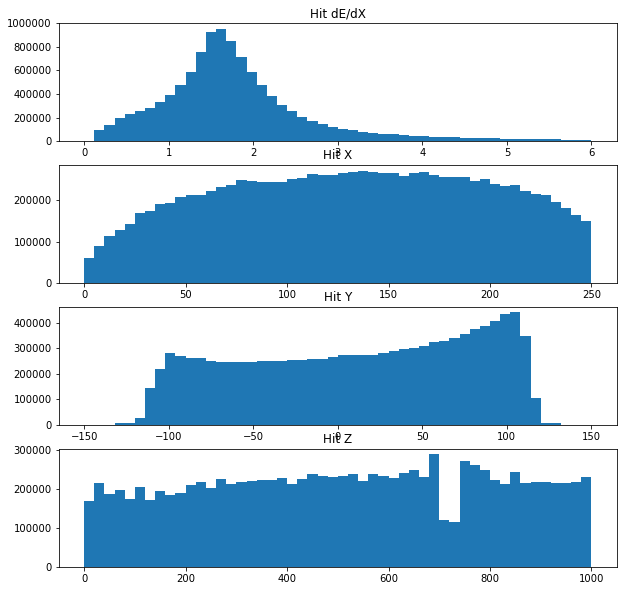

In [16]:
from QWorker import DistributedStripedSession, Histogram

registry_url = "http://ifdb01.fnal.gov:9867"
data_server_url = "http://dbweb7.fnal.gov:9091/striped/app"
dataset_name = "prod_anatree_optfilter_bnb_v11_unblind_mcc8"
#dataset_name = "prodgenie_bnb_cosmics_anatree_mcc8.6"
#dataset_name = "prod_anatree_optfilter_extbnb_v11_mcc8_dev"
    
session = DistributedStripedSession(data_server_url, registry_url)
job = session.createJob(dataset_name, 
                        histograms = { 
                                        "dedx": Histogram(0.0, 6.0, 50, title="Hit dE/dX"),
                                        "hitx": Histogram(0.0, 250.0, 50, title="Hit X"),
                                        "hity": Histogram(-150.0, 150.0, 50, title="Hit Y"),
                                        "hitz": Histogram(0.0, 1000.0, 50, title="Hit Z")
                                     }
                            
    )
job.start()
job.waitDone()

runtime = job.TFinish - job.TStart
nevents = job.EventsProcessed
nworkers = len(job.WorkerAddresses)
print "Job finished. %d events processed using %d workers in %.1f seconds, %.2e events/second" % (
                nevents, nworkers, runtime, float(nevents)/runtime)

    
